# Karaoke Recommender

### DATA DICTIONARY

id (string)
>The Spotify ID for the track.

acousticness (float)
>A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.

analysis_url (string)	
>An HTTP URL to access the full audio analysis of this track. An access token is required to access this data.

danceability (float)	
>Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.

duration_ms (int)	
>The duration of the track in milliseconds.

energy (float)	
>Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity.
Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.

instrumentalness (float)
>Predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal". The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.

key (int)	
>The key the track is in. Integers map to pitches using standard Pitch Class notation. E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on.

liveness (float)
>Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.

loudness (float)
>The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typical range between -60 and 0 db.

mode (int)	
>Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.

speechiness (float)	
>Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.

tempo (float)	
>The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.
time_signature	int	An estimated overall time signature of a track. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure).

track_href (string)	
>A link to the Web API endpoint providing full details of the track.

type (string)	
>The object type: "audio_features"

valence	(float)	
>A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).

In [1]:
import pandas as pd
import numpy as np

In [2]:
# import CSV of Top Karaoke Songs
tks1 = pd.read_excel('/Users/andrewjeong/Downloads/karaoke_capstone/karafuncatalog.xlsx')
tks1.head()

Title           Artist
0                     Jingle Bells  Christmas Carol
1    We Wish You A Merry Christmas  Christmas Carol
2                     Silent Night  Christmas Carol
3  All I Want For Christmas Is You     Mariah Carey
4                      Uptown Funk       Bruno Mars

In [3]:
# import CSV of Top Karaoke Songs
tks = pd.read_excel('/Users/andrewjeong/Downloads/karaoke_capstone/TopKaraokeSongs.xlsx')
tks.head()

Title                        Artist
0            Let It Go                        Frozen
1                Happy             Pharrell Williams
2          Uptown Funk  Mark Ronson feat. Bruno Mars
3         Shake It off                  Taylor Swift
4  All About That Bass                Meghan Trainor

In [4]:
tks = pd.concat([tks,tks1])

In [5]:
tks.reset_index(drop=True, inplace=True)
tks.head()

Title                        Artist
0            Let It Go                        Frozen
1                Happy             Pharrell Williams
2          Uptown Funk  Mark Ronson feat. Bruno Mars
3         Shake It off                  Taylor Swift
4  All About That Bass                Meghan Trainor

In [6]:
tks['Title'] = tks['Title'].astype(basestring)

In [7]:
tks['Artist'] = tks['Artist'].astype(basestring)

In [8]:
tks.dtypes

Title     object
Artist    object
dtype: object

USE TABLE TO GET SPOTIFY ID & POPULARITY

In [9]:
# Import Spotipy (Spotify Wrapper) and fuction returning spotify ID using artist and track
import spotipy
sp = spotipy.Spotify()

def extract_id_pop(artist, title):
    results = sp.search(q=artist+" "+title) 
    try:
        return [artist, title, results['tracks']['items'][0]['id'], results['tracks']['items'][0]['popularity']]
    except:
        return [np.nan, np.nan, np.nan, np.nan]

In [10]:
tks1 = tks.iloc[:1000,:]
tks2 = tks.iloc[1000:2000,:]
tks3 = tks.iloc[2000:3000,:]
tks4 = tks.iloc[3000:4000,:]
tks5 = tks.iloc[4000:5000,:]
tks6 = tks.iloc[6000:7000,:]
tks7 = tks.iloc[7000:8000,:]
tks8 = tks.iloc[8000:9000,:]
tks9 = tks.iloc[9000:10000,:]
tks10 = tks.iloc[10000:11000,:]
tks11 = tks.iloc[11000:12000,:]
tks12 = tks.iloc[12000:13000,:]
tks13 = tks.iloc[13000:14000,:]
tks14 = tks.iloc[14000:15000,:]
tks15 = tks.iloc[16000:17000,:]
tks16 = tks.iloc[17000:18000,:]
tks17 = tks.iloc[18000:19000,:]
tks18 = tks.iloc[19000:20000,:]

In [12]:
# create list of spotify ID's
ids = []
for x in tks1.index:
    ids.append(extract_id_pop(tks1["Artist"][x], tks1["Title"][x]))
ids=np.array(ids)

retrying ...1secs
retrying ...1secs


In [13]:
tks = pd.DataFrame(ids, columns =['Artist','Title','id','popularity'])

In [14]:
tks = tks[tks['Title'].str.contains("nan") == False]

In [15]:
tks.reset_index(drop=True, inplace=True)

In [16]:
tks = tks[tks['id'].str.contains('nan')==False]

USE ID TO GET AUDIO FEATURES FOR EACH SONG

In [17]:
# Get features for each song in tks

from __future__ import print_function    # (at top of module)
from spotipy.oauth2 import SpotifyClientCredentials
import json
import spotipy
import time
import sys

client_credentials_manager = SpotifyClientCredentials(client_id='9342202d7b4640c8aa49d83b62b570ba', client_secret = '9c08dfa4279348dda0d13d410a762728')
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)
sp.trace=False

features = tks["id"].map(lambda x: sp.audio_features([x]))

retrying ...1secs
retrying ...1secs
retrying ...1secs


In [18]:
features.head()

0    [{u'track_href': u'https://api.spotify.com/v1/...
1    [{u'track_href': u'https://api.spotify.com/v1/...
2    [{u'track_href': u'https://api.spotify.com/v1/...
3    [{u'track_href': u'https://api.spotify.com/v1/...
4    [{u'track_href': u'https://api.spotify.com/v1/...
Name: id, dtype: object

CONVERT & MERGE TO ONE DATAFRAME

In [19]:
f =[]
for d in features:
    for l in d:
        f.append(l)

In [20]:
f

[{u'acousticness': 0.556,
  u'analysis_url': u'https://api.spotify.com/v1/audio-analysis/0qcr5FMsEO85NAQjrlDRKo',
  u'danceability': 0.539,
  u'duration_ms': 223840,
  u'energy': 0.488,
  u'id': u'0qcr5FMsEO85NAQjrlDRKo',
  u'instrumentalness': 0,
  u'key': 8,
  u'liveness': 0.122,
  u'loudness': -6.864,
  u'mode': 1,
  u'speechiness': 0.0318,
  u'tempo': 137.073,
  u'time_signature': 4,
  u'track_href': u'https://api.spotify.com/v1/tracks/0qcr5FMsEO85NAQjrlDRKo',
  u'type': u'audio_features',
  u'uri': u'spotify:track:0qcr5FMsEO85NAQjrlDRKo',
  u'valence': 0.373},
 {u'acousticness': 0.286,
  u'analysis_url': u'https://api.spotify.com/v1/audio-analysis/6NPVjNh8Jhru9xOmyQigds',
  u'danceability': 0.652,
  u'duration_ms': 233305,
  u'energy': 0.757,
  u'id': u'6NPVjNh8Jhru9xOmyQigds',
  u'instrumentalness': 0,
  u'key': 1,
  u'liveness': 0.0886,
  u'loudness': -6.819,
  u'mode': 1,
  u'speechiness': 0.153,
  u'tempo': 159.911,
  u'time_signature': 4,
  u'track_href': u'https://api.spotif

In [21]:
# convert features to dataframe
af = pd.DataFrame(f)

In [22]:
af

acousticness                                       analysis_url  \
0        0.556000  https://api.spotify.com/v1/audio-analysis/0qcr...   
1        0.286000  https://api.spotify.com/v1/audio-analysis/6NPV...   
2        0.041700  https://api.spotify.com/v1/audio-analysis/5Mju...   
3        0.003100  https://api.spotify.com/v1/audio-analysis/1j2s...   
4        0.047600  https://api.spotify.com/v1/audio-analysis/0ifS...   
5        0.474000  https://api.spotify.com/v1/audio-analysis/34gC...   
6        0.921000  https://api.spotify.com/v1/audio-analysis/2muX...   
7        0.568000  https://api.spotify.com/v1/audio-analysis/5Db9...   
8        0.850000  https://api.spotify.com/v1/audio-analysis/2yi7...   
9        0.622000  https://api.spotify.com/v1/audio-analysis/0ej0...   
10       0.250000  https://api.spotify.com/v1/audio-analysis/77NN...   
11       0.162000  https://api.spotify.com/v1/audio-analysis/3s4U...   
12       0.639000  https://api.spotify.com/v1/audio-analysis/3VTN...   
13       0.505000  https://api.spotify.com/v1/audio-analysis/6l7t...   
14       0.831000  https://api.spotify.com/v1/audio-analysis/1hwd...   
15       0.577000  https://api.spotify.com/v1/audio-analysis/1hBu...   
16       0.032200  https://api.spotify.com/v1/audio-analysis/33NH...   
17       0.000453  https://api.spotify.com/v1/audio-analysis/5wj4...   
18       0.146000  https://api.spotify.com/v1/audio-analysis/2XPc...   
19       0.022500  https://api.spotify.com/v1/audio-analysis/1OtW...   
20       0.005030  https://api.spotify.com/v1/audio-analysis/6QUv...   
21       0.048800  https://api.spotify.com/v1/audio-analysis/7hQJ...   
22       0.590000  https://api.spotify.com/v1/audio-analysis/5k3U...   
23       0.566000  https://api.spotify.com/v1/audio-analysis/2SpE...   
24       0.408000  https://api.spotify.com/v1/audio-analysis/6lTT...   
25       0.416000  https://api.spotify.com/v1/audio-analysis/4w3t...   
26       0.046400  https://api.spotify.com/v1/audio-analysis/2Fic...   
27       0.163000  https://api.spotify.com/v1/audio-analysis/7CKb...   
28       0.701000  https://api.spotify.com/v1/audio-analysis/5ts8...   
29       0.031900  https://api.spotify.com/v1/audio-analysis/1z3Q...   
..            ...                                                ...   
936      0.727000  https://api.spotify.com/v1/audio-analysis/4nbI...   
937      0.046300  https://api.spotify.com/v1/audio-analysis/7Dmz...   
938      0.839000  https://api.spotify.com/v1/audio-analysis/7dbl...   
939      0.715000  https://api.spotify.com/v1/audio-analysis/39I5...   
940      0.105000  https://api.spotify.com/v1/audio-analysis/5pQt...   
941      0.019200  https://api.spotify.com/v1/audio-analysis/61UU...   
942      0.536000  https://api.spotify.com/v1/audio-analysis/4YGl...   
943      0.025700  https://api.spotify.com/v1/audio-analysis/0ttK...   
944      0.551000  https://api.spotify.com/v1/audio-analysis/18AX...   
945      0.893000  https://api.spotify.com/v1/audio-analysis/54c6...   
946      0.270000  https://api.spotify.com/v1/audio-analysis/7Ld1...   
947      0.146000  https://api.spotify.com/v1/audio-analysis/7ras...   
948      0.834000  https://api.spotify.com/v1/audio-analysis/4oa1...   
949      0.614000  https://api.spotify.com/v1/audio-analysis/3Bqq...   
950      0.054400  https://api.spotify.com/v1/audio-analysis/0sKl...   
951      0.909000  https://api.spotify.com/v1/audio-analysis/7DH5...   
952      0.350000  https://api.spotify.com/v1/audio-analysis/6hr4...   
953      0.002560  https://api.spotify.com/v1/audio-analysis/5EXO...   
954      0.466000  https://api.spotify.com/v1/audio-analysis/0PGw...   
955      0.018500  https://api.spotify.com/v1/audio-analysis/07Gv...   
956      0.805000  https://api.spotify.com/v1/audio-analysis/1M2K...   
957      0.912000  https://api.spotify.com/v1/audio-analysis/3zS4...   
958      0.137000  https://api.spotify.com/v1/audio-analysis/4tY0...   
959      0.360000  https://api.spotify.com/v1

In [23]:
# Join dataframe tks (karaoke songs) and dataframe features on id
af = pd.merge(tks,af, on=['id','id'])

In [24]:
af.head()

Artist      Title                      id popularity  \
0             Frozen  Let It Go  0qcr5FMsEO85NAQjrlDRKo         65   
1             Frozen  Let It Go  0qcr5FMsEO85NAQjrlDRKo         65   
2       Idina Menzel  Let It Go  0qcr5FMsEO85NAQjrlDRKo         65   
3       Idina Menzel  Let It Go  0qcr5FMsEO85NAQjrlDRKo         65   
4  Pharrell Williams      Happy  6NPVjNh8Jhru9xOmyQigds         74   

   acousticness                                       analysis_url  \
0         0.556  https://api.spotify.com/v1/audio-analysis/0qcr...   
1         0.556  https://api.spotify.com/v1/audio-analysis/0qcr...   
2         0.556  https://api.spotify.com/v1/audio-analysis/0qcr...   
3         0.556  https://api.spotify.com/v1/audio-analysis/0qcr...   
4         0.286  https://api.spotify.com/v1/audio-analysis/6NPV...   

   danceability  duration_ms  energy  instrumentalness   ...    liveness  \
0         0.539       223840   0.488               0.0   ...      0.1220   
1         0.539       223840   0.488               0.0   ...      0.1220   
2         0.539       223840   0.488               0.0   ...      0.1220   
3         0.539       223840   0.488               0.0   ...      0.1220   
4         0.652       233305   0.757               0.0   ...      0.0886   

   loudness  mode  speechiness    tempo  time_signature  \
0    -6.864     1       0.0318  137.073               4   
1    -6.864     1       0.0318  137.073               4   
2    -6.864     1       0.0318  137.073               4   
3    -6.864     1       0.0318  137.073               4   
4    -6.819     1       0.1530  159.911               4   

                                          track_href            type  \
0  https://api.spotify.com/v1/tracks/0qcr5FMsEO85...  audio_features   
1  https://api.spotify.com/v1/tracks/0qcr5FMsEO85...  audio_features   
2  https://api.spotify.com/v1/tracks/0qcr5FMsEO85...  audio_features   
3  https://api.spotify.com/v1/tracks/0qcr5FMsEO85...  audio_features   
4  https://api.spotify.com/v1/tracks/6NPVjNh8Jhru...  audio_features   

                                    uri valence  
0  spotify:track:0qcr5FMsEO85NAQjrlDRKo   0.373  
1  spotify:track:0qcr5FMsEO85NAQjrlDRKo   0.373  
2  spotify:track:0qcr5FMsEO85NAQjrlDRKo   0.373  
3  spotify:track:0qcr5FMsEO85NAQjrlDRKo   0.373  
4  spotify:track:6NPVjNh8Jhru9xOmyQigds   0.962  

[5 rows x 21 columns]

In [25]:
af.drop_duplicates('id', inplace=True)

In [26]:
af.reset_index(drop=True, inplace=True)

In [27]:
af[af.duplicated('Title')].sort_values(by='Title').head()

Artist                            Title  \
369             Lady Antebellum  All I Want For Christmas Is You   
584  Vince Vance & The Valiants  All I Want For Christmas Is You   
522                        Glee  All I Want For Christmas Is You   
170               Michael Bublé  All I Want For Christmas Is You   
521               Elvis Presley                Always On My Mind   

                         id popularity  acousticness  \
369  1tJULFJmqZUh3u1xKwA9q6         46        0.7150   
584  5WBDqBgGq7LKj38J0QUETf         51        0.2520   
522  0sjqNUo0kCODcRZ0BIGUti         56        0.0269   
170  0xPaZrF25ltzvz1a2Pm5DQ         66        0.4200   
521  0AmAZBnbXW7Dq1ykCamvRl         55        0.4630   

                                          analysis_url  danceability  \
369  https://api.spotify.com/v1/audio-analysis/1tJU...         0.617   
584  https://api.spotify.com/v1/audio-analysis/5WBD...         0.451   
522  https://api.spotify.com/v1/audio-analysis/0sjq...         0.465   
170  https://api.spotify.com/v1/audio-analysis/0xPa...         0.503   
521  https://api.spotify.com/v1/audio-analysis/0AmA...         0.387   

     duration_ms  energy  instrumentalness   ...    liveness  loudness  mode  \
369       215800   0.536          0.000000   ...      0.2480    -6.855     1   
584       227840   0.470          0.000015   ...      0.0867    -8.427     1   
522       243773   0.945          0.000555   ...      0.6700    -2.940     1   
170       171827   0.465          0.000000   ...      0.1010    -8.077     0   
521       217467   0.747          0.000528   ...      0.1420    -7.847     1   

     speechiness    tempo  time_signature  \
369       0.0295  125.928               4   
584       0.0250  108.591               3   
522       0.0777  147.088               4   
170       0.0274  141.796               4   
521       0.0601  179.004               4   

                                            track_href            type  \
369  https://api.spotify.com/v1/tracks/1tJULFJmqZUh...  audio_features   
584  https://api.spotify.com/v1/tracks/5WBDqBgGq7LK...  audio_features   
522  https://api.spotify.com/v1/tracks/0sjqNUo0kCOD...  audio_features   
170  https://api.spotify.com/v1/tracks/0xPaZrF25ltz...  audio_features   
521  https://api.spotify.com/v1/tracks/0AmAZBnbXW7D...  audio_features   

                                      uri valence  
369  spotify:track:1tJULFJmqZUh3u1xKwA9q6   0.201  
584  spotify:track:5WBDqBgGq7LKj38J0QUETf   0.445  
522  spotify:track:0sjqNUo0kCODcRZ0BIGUti   0.222  
170  spotify:track:0xPaZrF25ltzvz1a2Pm5DQ   0.147  
521  spotify:track:0AmAZBnbXW7Dq1ykCamvRl   0.457  

[5 rows x 21 columns]

In [28]:
# pickle dataframe
import pickle

with open('karaoke_songs.pkl', 'w') as ks:
    pickle.dump(af, ks)

In [29]:
# open pickled dataframe
with open('karaoke_songs.pkl', 'r') as ks:
    af = pickle.load(ks)

In [30]:
# strip spaces
af['Title'] = af['Title'].str.strip()
af['Artist'] = af['Artist'].str.strip()

In [31]:
# check unique values for column 'type'
af['type'].unique()

array([u'audio_features'], dtype=object)

In [32]:
# check unique values for column 'mode'
af['mode'].unique()

array([1, 0])

In [33]:
# drop columns ('analysis_url','track_href','type','uri')
af.drop(['analysis_url','track_href','type','uri'],axis=1,inplace=True)

In [34]:
af['popularity']=af['popularity'].astype('int')

In [35]:
# check types for columns
af.dtypes

Artist               object
Title                object
id                   object
popularity            int64
acousticness        float64
danceability        float64
duration_ms           int64
energy              float64
instrumentalness    float64
key                   int64
liveness            float64
loudness            float64
mode                  int64
speechiness         float64
tempo               float64
time_signature        int64
valence             float64
dtype: object

In [36]:
# Check for nulls
af[pd.isnull(af).any(axis=1)]

Empty DataFrame
Columns: [Artist, Title, id, popularity, acousticness, danceability, duration_ms, energy, instrumentalness, key, liveness, loudness, mode, speechiness, tempo, time_signature, valence]
Index: []

## Exploratory Data Analysis (EDA)

In [37]:
# Describe audio features 
af.describe()

popularity  acousticness  danceability    duration_ms      energy  \
count  898.000000    898.000000    898.000000     898.000000  898.000000   
mean    55.982183      0.440424      0.551585  218093.021158    0.512209   
std     19.372190      0.327842      0.167168   62574.871706    0.233539   
min      0.000000      0.000029      0.089900   48500.000000    0.008030   
25%     50.000000      0.114500      0.444500  179813.000000    0.321250   
50%     61.000000      0.414000      0.562500  213820.000000    0.513000   
75%     68.000000      0.742250      0.676750  251088.750000    0.706500   
max    100.000000      0.995000      0.978000  928928.000000    0.990000   

       instrumentalness         key    liveness    loudness        mode  \
count        898.000000  898.000000  898.000000  898.000000  898.000000   
mean           0.042019    5.092428    0.174422   -9.228329    0.779510   
std            0.164330    3.544797    0.145360    3.954974    0.414808   
min            0.000000    0.000000    0.031300  -29.614000    0.000000   
25%            0.000000    2.000000    0.090850  -11.692000    1.000000   
50%            0.000004    5.000000    0.120000   -8.640500    1.000000   
75%            0.000310    8.000000    0.196000   -6.137500    1.000000   
max            0.972000   11.000000    0.980000   -1.609000    1.000000   

       speechiness       tempo  time_signature     valence  
count   898.000000  898.000000      898.000000  898.000000  
mean      0.054298  118.563937        3.864143    0.513656  
std       0.049419   31.078799        0.442232    0.259761  
min       0.023600   51.660000        1.000000    0.038300  
25%       0.031400   94.991500        4.000000    0.291250  
50%       0.037500  116.717500        4.000000    0.498000  
75%       0.054000  136.480000        4.000000    0.730750  
max       0.453000  216.126000        5.000000    1.000000

In [38]:
# Correlation between various features
af_corr = af.corr()
af_corr

popularity  acousticness  danceability  duration_ms  \
popularity          1.000000     -0.267418      0.104766     0.157488   
acousticness       -0.267418      1.000000     -0.414221    -0.249126   
danceability        0.104766     -0.414221      1.000000    -0.078265   
duration_ms         0.157488     -0.249126     -0.078265     1.000000   
energy              0.267235     -0.743590      0.361508     0.101036   
instrumentalness   -0.419682      0.101548     -0.059200    -0.051991   
key                 0.061585     -0.010276     -0.016793    -0.027923   
liveness            0.020848     -0.063496     -0.053733    -0.025330   
loudness            0.331041     -0.560283      0.254093     0.095510   
mode               -0.052653      0.159928     -0.122431    -0.047596   
speechiness         0.104874     -0.118140      0.146041    -0.057126   
tempo               0.075136     -0.155698     -0.040397    -0.007062   
time_signature      0.075453     -0.243272      0.185369     0.054420   
valence             0.026353     -0.328242      0.595131    -0.258731   

                    energy  instrumentalness       key  liveness  loudness  \
popularity        0.267235         -0.419682  0.061585  0.020848  0.331041   
acousticness     -0.743590          0.101548 -0.010276 -0.063496 -0.560283   
danceability      0.361508         -0.059200 -0.016793 -0.053733  0.254093   
duration_ms       0.101036         -0.051991 -0.027923 -0.025330  0.095510   
energy            1.000000         -0.157469 -0.005354  0.178151  0.764125   
instrumentalness -0.157469          1.000000 -0.015315 -0.024284 -0.241828   
key              -0.005354         -0.015315  1.000000 -0.043232  0.007807   
liveness          0.178151         -0.024284 -0.043232  1.000000  0.103999   
loudness          0.764125         -0.241828  0.007807  0.103999  1.000000   
mode             -0.139834         -0.037293 -0.121080 -0.035136 -0.083909   
speechiness       0.213392         -0.028719  0.042550  0.120751  0.115183   
tempo             0.209505         -0.077364 -0.020690  0.044584  0.121493   
time_signature    0.217869         -0.065781 -0.021850 -0.013340  0.143849   
valence           0.503758         -0.036964 -0.024693  0.089715  0.241483   

                      mode  speechiness     tempo  time_signature   valence  
popularity       -0.052653     0.104874  0.075136        0.075453  0.026353  
acousticness      0.159928    -0.118140 -0.155698       -0.243272 -0.328242  
danceability     -0.122431     0.146041 -0.040397        0.185369  0.595131  
duration_ms      -0.047596    -0.057126 -0.007062        0.054420 -0.258731  
energy           -0.139834     0.213392  0.209505        0.217869  0.503758  
instrumentalness -0.037293    -0.028719 -0.077364       -0.065781 -0.036964  
key              -0.121080     0.042550 -0.020690       -0.021850 -0.024693  
liveness         -0.035136     0.120751  0.044584       -0.013340  0.089715  
loudness         -0.083909     0.115183  0.121493        0.143849  0.241483  
mode              1.000000    -0.183551  0.010691       -0.011546 -0.048338  
speechiness      -0.183551     1.000000  0.222973        0.058714  0.188840  
tempo             0.010691     0.222973  1.000000        0.020985  0.184992  
time_signature   -0.011546     0.058714  0.020985        1.000000  0.181275  
valence          -0.048338     0.188840  0.184992        0.181275  1.000000

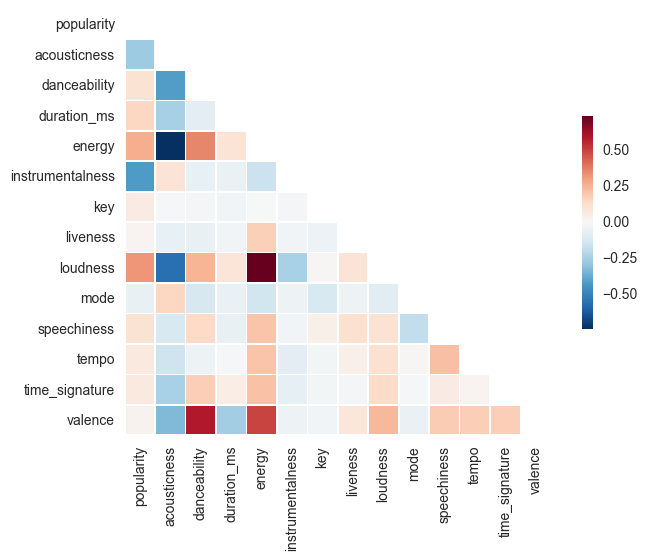

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

sns.set(style="white")

# Generate a mask for the upper triangle
mask = np.zeros_like(af_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(af_corr, mask=mask, vmax=.3,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

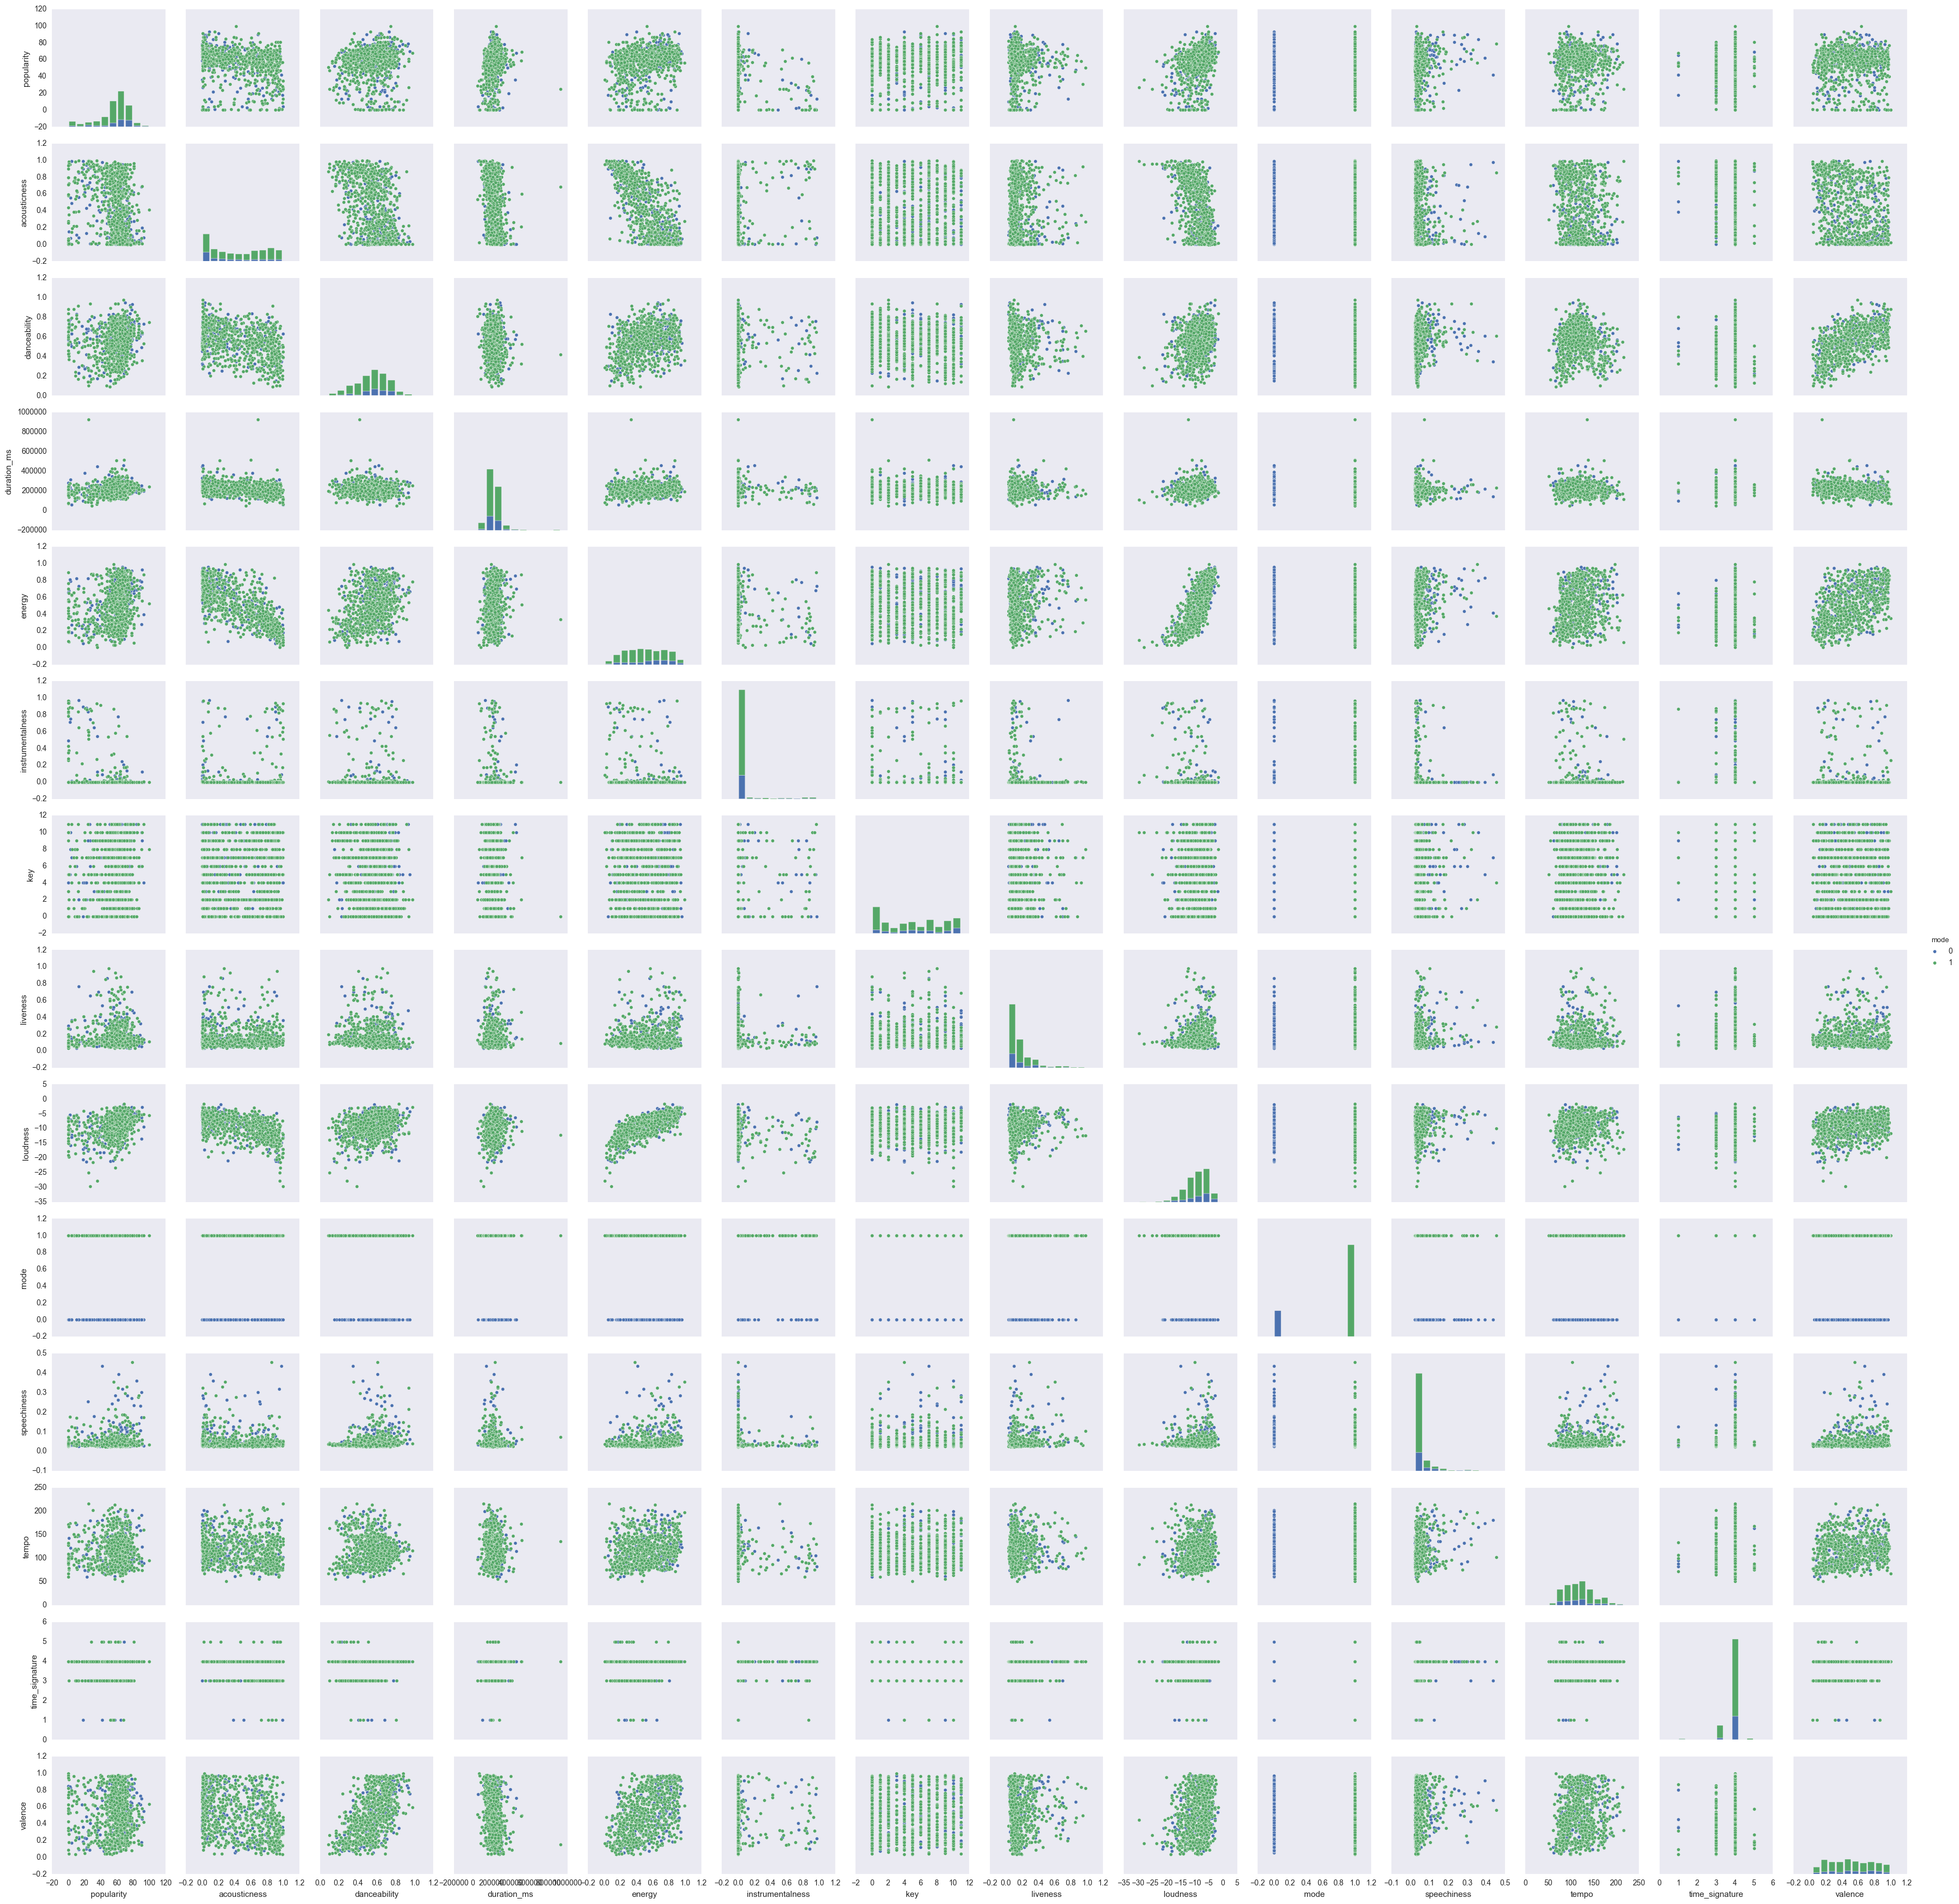

In [40]:
sns.set(style="dark")
sns.pairplot(af, hue='mode');

In [41]:
afe = af[['Title','energy']].sort_values('energy', ascending = False).head(10)
afe

Title  energy
766                      Country Roads   0.990
751           You Give Love a Bad Name   0.959
248                        Barbie Girl   0.948
887                    Go Your Own Way   0.947
522    All I Want For Christmas Is You   0.945
478                   Bring Me To Life   0.945
54                       Gangnam Style   0.939
786  Rockin' Around The Christmas Tree   0.939
732            Never Gonna Give You Up   0.939
351          This Is What You Came For   0.928

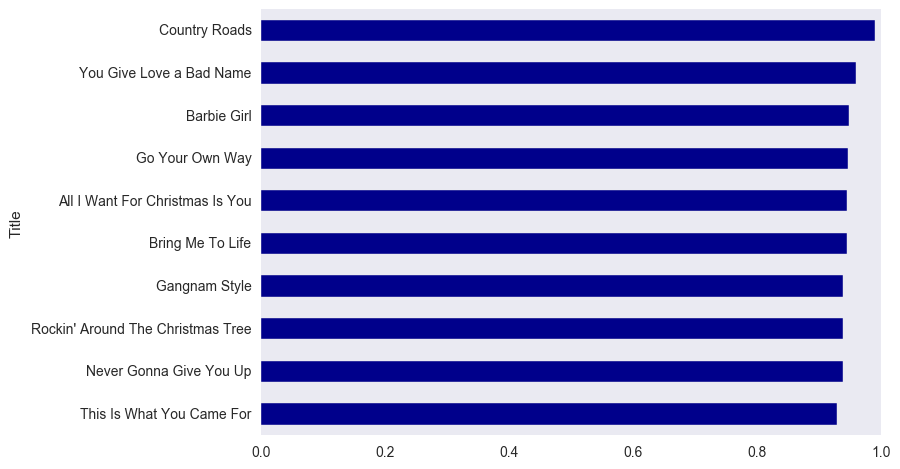

In [42]:
fig, ax = plt.subplots()
afe.plot(kind='barh', x='Title',y='energy', color='darkblue', ax=ax)
plt.gca().invert_yaxis()
ax.legend_.remove()

In [43]:
afd = af[['Title','danceability']].sort_values('danceability', ascending = False).head(10)
afd

Title  danceability
66                                Ice Ice Baby         0.978
817                        The Real Slim Shady         0.950
707                                      Shoop         0.939
344                              Baby Got Back         0.937
695                      Baa, Baa, Black Sheep         0.936
287                                     Me Too         0.934
264                                Billie Jean         0.920
377  Cups (You're Gonna Miss Me When I'm Gone)         0.917
745                              Hotline Bling         0.904
305                                Celebration         0.894

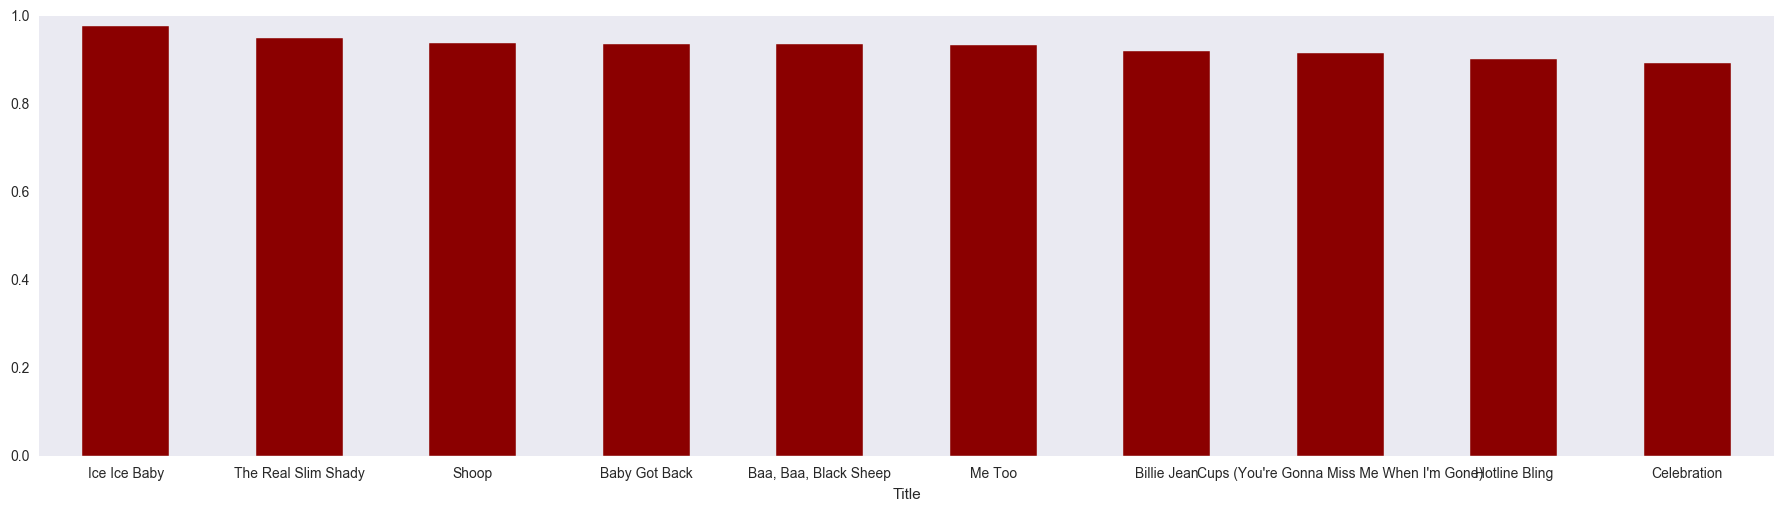

In [44]:
fig, ax = plt.subplots()
afd.plot(kind='bar', x='Title',y='danceability', color='darkred', ax=ax, legend=False, figsize=(18,8))
plt.tight_layout()
ax.set_xticklabels(ax.xaxis.get_majorticklabels(),rotation=360);

In [45]:
af[af['Title']=='Twinkle Twinkle Little Star']

Artist                        Title                      id  \
62    Kids Karaoke  Twinkle Twinkle Little Star  0Z1Xwo1AJ5pysbWdyZzlfa   
208  Nursery Rhyme  Twinkle Twinkle Little Star  4JweoWyImlJk2wH5EjgQnN   

     popularity  acousticness  danceability  duration_ms  energy  \
62            0        0.0245         0.881        68453   0.348   
208          36        0.8710         0.677        95948   0.224   

     instrumentalness  key  liveness  loudness  mode  speechiness    tempo  \
62           0.257000    3     0.106   -11.639     1        0.105   67.496   
208          0.000001   11     0.101    -9.197     1        0.029  110.077   

     time_signature  valence  
62                4    1.000  
208               4    0.362

In [46]:
aft = af[['Title','tempo']].sort_values('tempo', ascending = False).head(10)
aft

Title    tempo
527                              Alphabet Song  216.126
78                  You're The One That I Want  213.840
773                           Somethin' Stupid  207.431
65                        The Bare Necessities  205.755
361                            Mele Kalikimaka  203.852
347                                     Chunky  202.103
136   It's The Most Wonderful Time Of The Year  202.082
15                       Islands In The Stream  202.074
693  Grandpa (Tell Me 'Bout The Good Old Days)  201.672
383                              Dirty Laundry  200.179

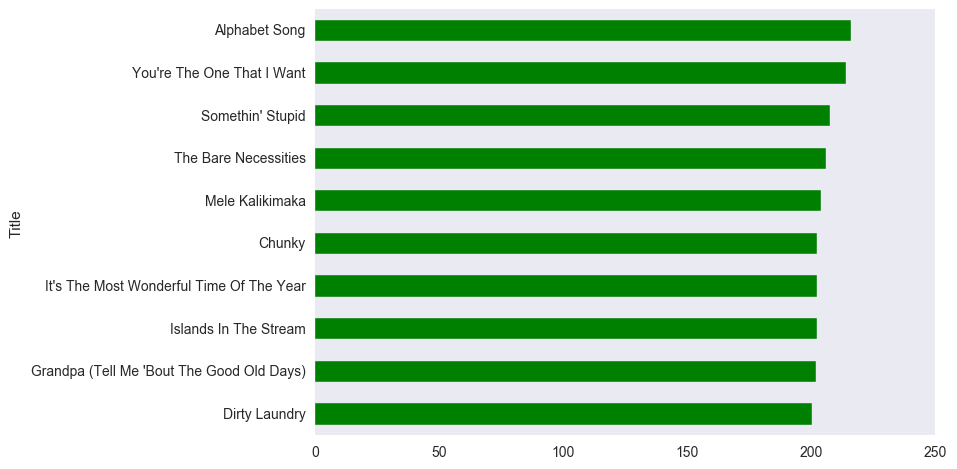

In [47]:
fig, ax = plt.subplots()
aft.plot(kind='barh', x='Title',y='tempo', color='green', ax=ax)
plt.gca().invert_yaxis()
ax.legend_.remove()

# Data Mining

In [48]:
import math
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 
from sklearn.preprocessing import LabelEncoder

In [49]:
af.T

0                       1    \
Artist                            Frozen       Pharrell Williams   
Title                          Let It Go                   Happy   
id                0qcr5FMsEO85NAQjrlDRKo  6NPVjNh8Jhru9xOmyQigds   
popularity                            65                      74   
acousticness                       0.556                   0.286   
danceability                       0.539                   0.652   
duration_ms                       223840                  233305   
energy                             0.488                   0.757   
instrumentalness                       0                       0   
key                                    8                       1   
liveness                           0.122                  0.0886   
loudness                          -6.864                  -6.819   
mode                                   1                       1   
speechiness                       0.0318                   0.153   
tempo                            137.073                 159.911   
time_signature                         4                       4   
valence                            0.373                   0.962   

                                           2                       3    \
Artist            Mark Ronson feat. Bruno Mars            Taylor Swift   
Title                              Uptown Funk            Shake It off   
id                      5MjukdbL11ysj7TnEM2GPn  1j2sRZpFUzG6wPJGfRvet3   
popularity                                  10                      49   
acousticness                            0.0417                  0.0031   
danceability                             0.823                   0.598   
duration_ms                             271360                  217602   
energy                                   0.498                   0.909   
instrumentalness                             0                 0.00499   
key                                          0                       6   
liveness                                 0.107                  0.0734   
loudness                                -7.257                  -4.686   
mode                                         1                       1   
speechiness                              0.102                  0.0559   
tempo                                  115.046                 160.046   
time_signature                               4                       4   
valence                                  0.638                   0.966   

                                     4                       5    \
Artist                    Meghan Trainor              Ed Sheeran   
Title                All About That Bass       Thinking Out Loud   
id                0ifSeVGUr7py5GggttDhXw  34gCuhDGsG4bRPIf9bb02f   
popularity                            70                      84   
acousticness                      0.0476                   0.474   
danceability                       0.811                   0.781   
duration_ms                       188754                  281560   
energy                             0.879                   0.445   
instrumentalness                1.91e-06                       0   
key                                    9                       2   
liveness                           0.109                   0.184   
loudness                          -3.724                  -6.061   
mode                                   1                       1   
speechiness                       0.0514                  0.0295   
tempo                            134.064                  78.998   
time_signature                         4                       4   
valence                            0.962                   0.584   

                                     6                       7    \
Artist                      Taylor Swift               Sam Smith   
Title                        Blank Space            Stay With Me   
id                2muXrVYHVCUOuth8MePP3K  5Db9VIdD

In [50]:
x = af.iloc[:,4:]
X = StandardScaler().fit_transform(x)

In [51]:
af_norm = pd.DataFrame(X, columns=[x.columns])

/Users/andrewjeong/anaconda/lib/python2.7/site-packages/seaborn/categorical.py:2171: UserWarning: The boxplot API has been changed. Attempting to adjust your arguments for the new API (which might not work). Please update your code. See the version 0.6 release notes for more info.
  warnings.warn(msg, UserWarning)


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 13 Text xticklabel objects>)

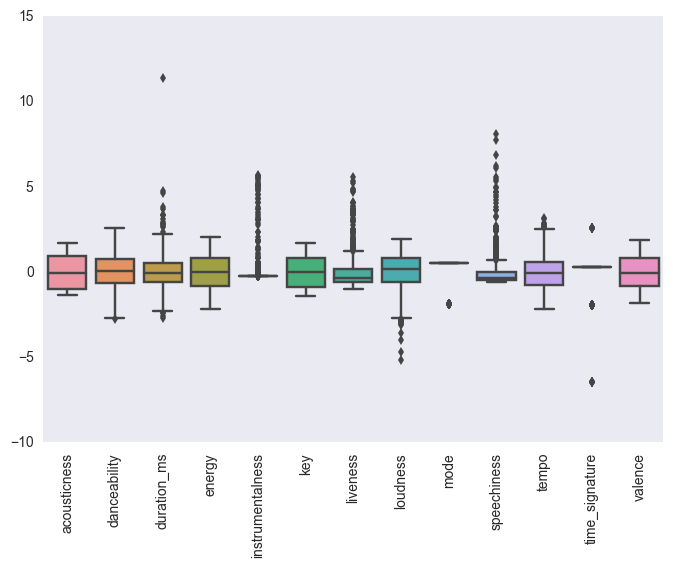

In [52]:
sns.boxplot(af_norm)
plt.xticks(rotation=90) 

# PCA

In [53]:
from sklearn.decomposition import PCA

pca = PCA(n_components=13)
X_pca = pca.fit_transform(X)

In [54]:
pca.explained_variance_ratio_

array([ 0.2491468 ,  0.10945902,  0.09497736,  0.09026991,  0.07819518,
        0.07534093,  0.06872677,  0.06558864,  0.05401392,  0.05143281,
        0.02784188,  0.02581067,  0.00919612])

In [55]:
cumulvarExpl = pca.explained_variance_ratio_.cumsum()
cumulvarExpl

array([ 0.2491468 ,  0.35860582,  0.45358317,  0.54385308,  0.62204826,
        0.69738919,  0.76611596,  0.8317046 ,  0.88571852,  0.93715133,
        0.96499321,  0.99080388,  1.        ])

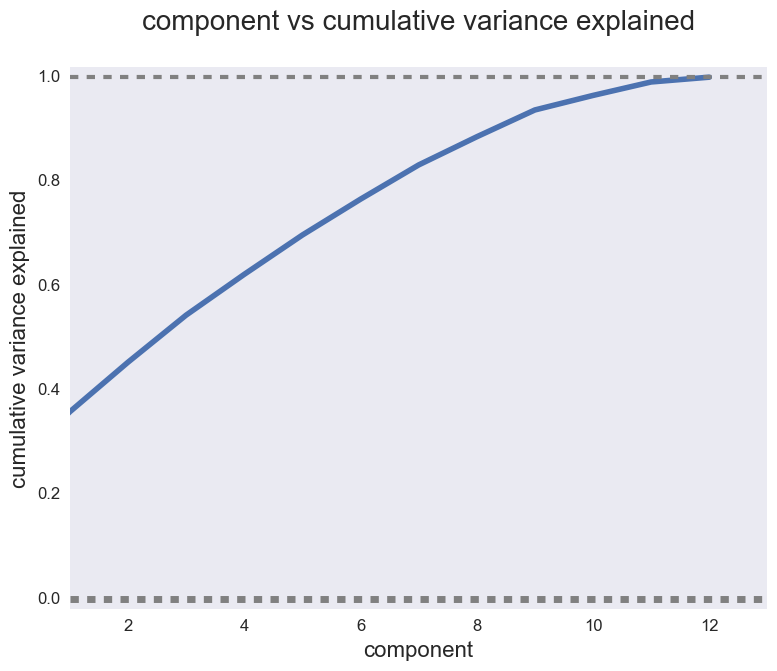

In [56]:
plt.figure(figsize=(9,7))

component_number = range(13)

plt.plot(component_number, cumulvarExpl, lw=4)

plt.axhline(y=0, linewidth=5, color='grey', ls='dashed')
plt.axhline(y=1, linewidth=3, color='grey', ls='dashed')


ax = plt.gca()
ax.set_xlim([1,13])
ax.set_ylim([-.02,1.02])

ax.set_ylabel('cumulative variance explained', fontsize=16)
ax.set_xlabel('component', fontsize=16)

for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(12) 
    
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(12) 
    
ax.set_title('component vs cumulative variance explained\n', fontsize=20)

plt.show()

In [57]:
Xt = pd.DataFrame(X_pca, columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12','PC13'])
Xt.head()

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0  0.176441  0.551573 -0.055428 -0.158708 -1.050001 -0.140366  0.073680   
1 -2.355183 -0.892965  0.543975 -1.180388 -0.021258 -1.699962  0.247644   
2 -1.617572  0.047710 -0.997555 -0.498778  0.642574 -1.004453 -0.008401   
3 -2.811717 -0.099915 -0.193171 -0.709610 -0.823252 -0.682609  1.022887   
4 -3.079504 -0.750646 -0.796058  0.020349 -1.140698  0.290987  0.796844   

        PC8       PC9      PC10      PC11      PC12      PC13  
0  0.715803 -0.158269  0.045793 -0.029135 -0.759701  0.030526  
1 -0.700709  0.807237  0.496509  0.740682  0.230214 -0.108827  
2 -1.175207  1.252329  0.156712 -0.596364 -0.245044 -0.568030  
3  0.752557 -0.225156 -0.056061  0.551851  0.538864 -0.071709  
4  0.865554  0.277193 -0.055827  0.136030 -0.153826  0.025365

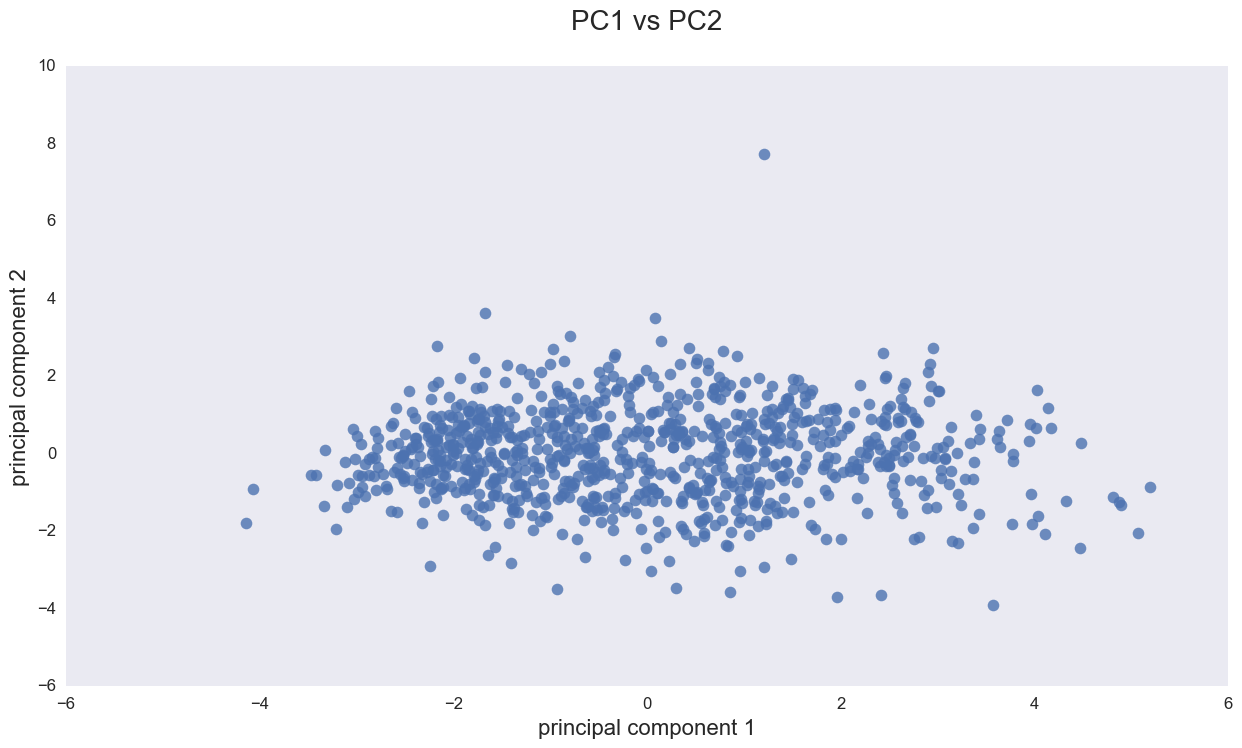

In [58]:
fig = plt.figure(figsize=(15,8))

ax = fig.gca()
ax = sns.regplot(Xt.iloc[:,0], Xt.iloc[:,1],
                 fit_reg=False, scatter_kws={'s':70}, ax=ax)

ax.set_xlabel('principal component 1', fontsize=16)
ax.set_ylabel('principal component 2', fontsize=16)


for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(12) 
    
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(12) 
    
ax.set_title('PC1 vs PC2\n', fontsize=20)

plt.show()

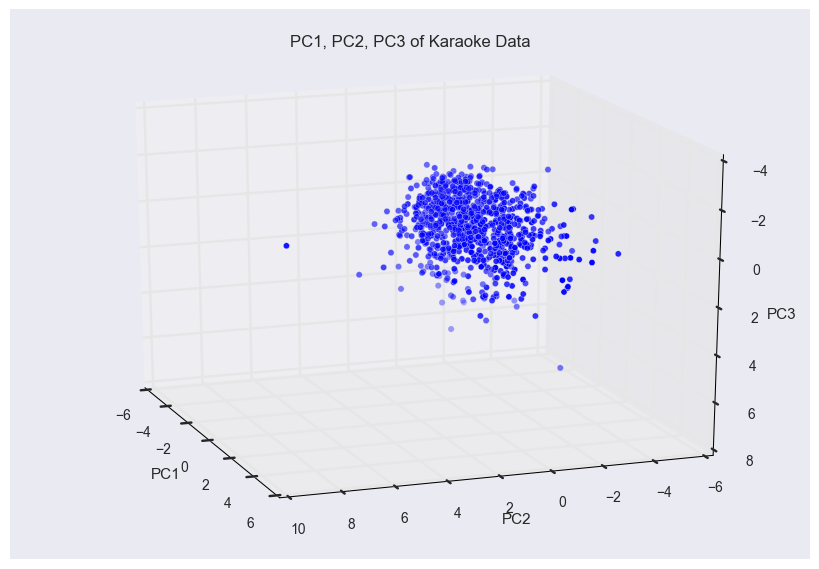

In [59]:
from mpl_toolkits.mplot3d import Axes3D

plt.close('all')
fig1 = plt.figure()
ax = Axes3D(fig1)
ax.scatter(xs = Xt['PC1'], ys = Xt['PC2'], zs = Xt['PC3'])

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title('PC1, PC2, PC3 of Karaoke Data')

ax.azim = 200
ax.elev = 199

plt.show()

# KMEANS

In [60]:
from sklearn.metrics import pairwise_distances
from sklearn import cluster, datasets, preprocessing, metrics

In [61]:
k = 10
kmeans = cluster.KMeans(n_clusters=k)
kmeans.fit(Xt)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=10, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [62]:
labels = kmeans.labels_
centroids = kmeans.cluster_centers_
inertia = kmeans.inertia_

In [63]:
centroids

array([[ -1.16010599e+00,  -6.87180491e-03,   1.55516597e+00,
         -1.10055587e+00,   1.17299076e+00,   1.74690260e+00,
         -1.08140412e+00,   9.08297967e-01,   2.31401881e-01,
         -7.32102838e-01,  -1.82720529e-01,  -1.72145747e-01,
          8.12133461e-02],
       [  2.36496929e-01,  -1.20776433e+00,  -4.27567717e-01,
         -6.32894945e-01,  -4.04883761e-01,  -1.25943707e-01,
         -1.90036650e-01,  -4.35308257e-02,  -4.76070632e-02,
         -1.12737243e-01,   1.76076541e-01,  -8.13847035e-02,
         -1.26701681e-03],
       [ -8.27409057e-02,   1.41761571e+00,  -1.95933503e-01,
         -3.12750810e-01,  -4.88047977e-02,  -2.55433503e-01,
         -7.92207894e-02,   3.11664567e-01,   2.01987271e-01,
          9.92931590e-02,  -1.61802502e-01,  -4.14535194e-02,
          2.37782398e-02],
       [ -1.69502572e+00,   2.66545043e-01,   2.58442938e-01,
          1.36305941e+00,   1.28305244e-01,   1.44785654e-02,
          7.50497797e-02,  -4.99252639e-01,  -8.748

In [64]:
inertia

6014.6061238822494

In [65]:
# silhouette score change based on k (plot)

metrics.silhouette_score(Xt, labels, metric='euclidean')

0.13518354193001142

In [66]:
Xt['cluster']= pd.Series(labels)

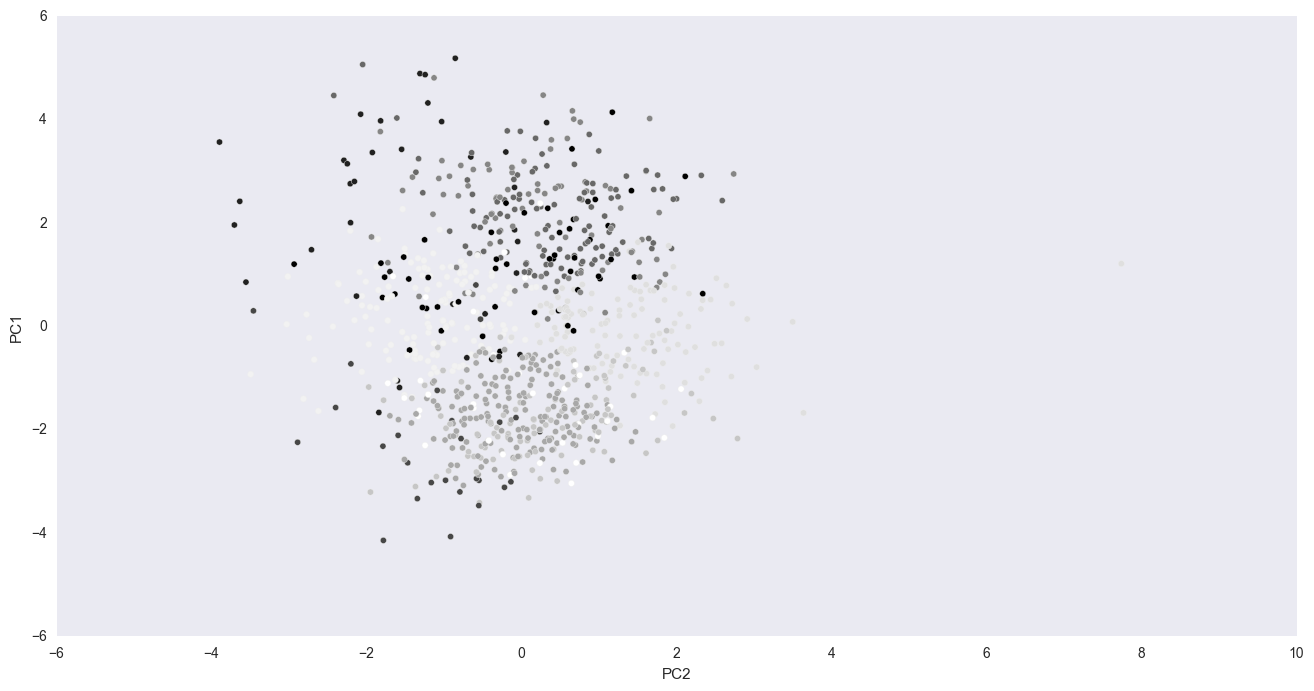

In [67]:
Xt.plot(kind='scatter', x='PC2',y='PC1', c=Xt.cluster.astype(np.float),figsize=(16,8))

# DBSCAN

In [68]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

In [69]:
db = DBSCAN(eps=0.3, min_samples=14)

In [70]:
db.fit(Xt)

DBSCAN(algorithm='auto', eps=0.3, leaf_size=30, metric='euclidean',
    min_samples=14, n_jobs=1, p=None)

In [71]:
core_samples = db.core_sample_indices_
dblabels = db.labels_

In [157]:
silhouette_score(Xt, dblabels)

ValueError: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)

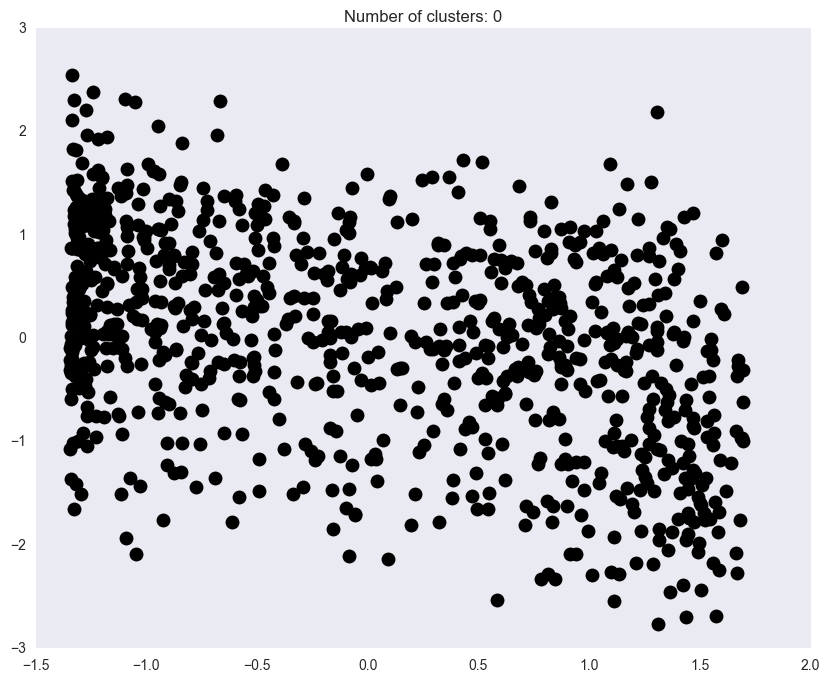

In [72]:
def plot_dbscan(db, Xt):
    fig = plt.figure(figsize=(10,8))
    
    core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
    core_samples_mask[db.core_sample_indices_] = True
    labels = db.labels_

    # Number of clusters in labels, ignoring noise if present.
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

    # Black removed and is used for noise instead.
    unique_labels = set(labels)
    colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))
    for k, col in zip(unique_labels, colors):
        if k == -1:
            # Black used for noise.
            col = 'k'

        class_member_mask = (labels == k)

        xy = X[class_member_mask & core_samples_mask]
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
                 markeredgecolor='k', markersize=10)

        xy = X[class_member_mask & ~core_samples_mask]
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
                 markeredgecolor='k', markersize=10)
        

    plt.title('Number of clusters: %d' % n_clusters_);
    
plot_dbscan(db, Xt)

## HIERARCHICAL

In [81]:
from scipy.cluster import hierarchy
from scipy.spatial import distance as ssd
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet, fcluster
from scipy.spatial import distance as ssd
from scipy.spatial.distance import pdist

In [82]:
Z = linkage(pdist(Xt), 'ward')

In [83]:
c, coph_dists = cophenet(Z, pdist(Xt))
c

0.63595484979607519

([], <a list of 0 Text xticklabel objects>)

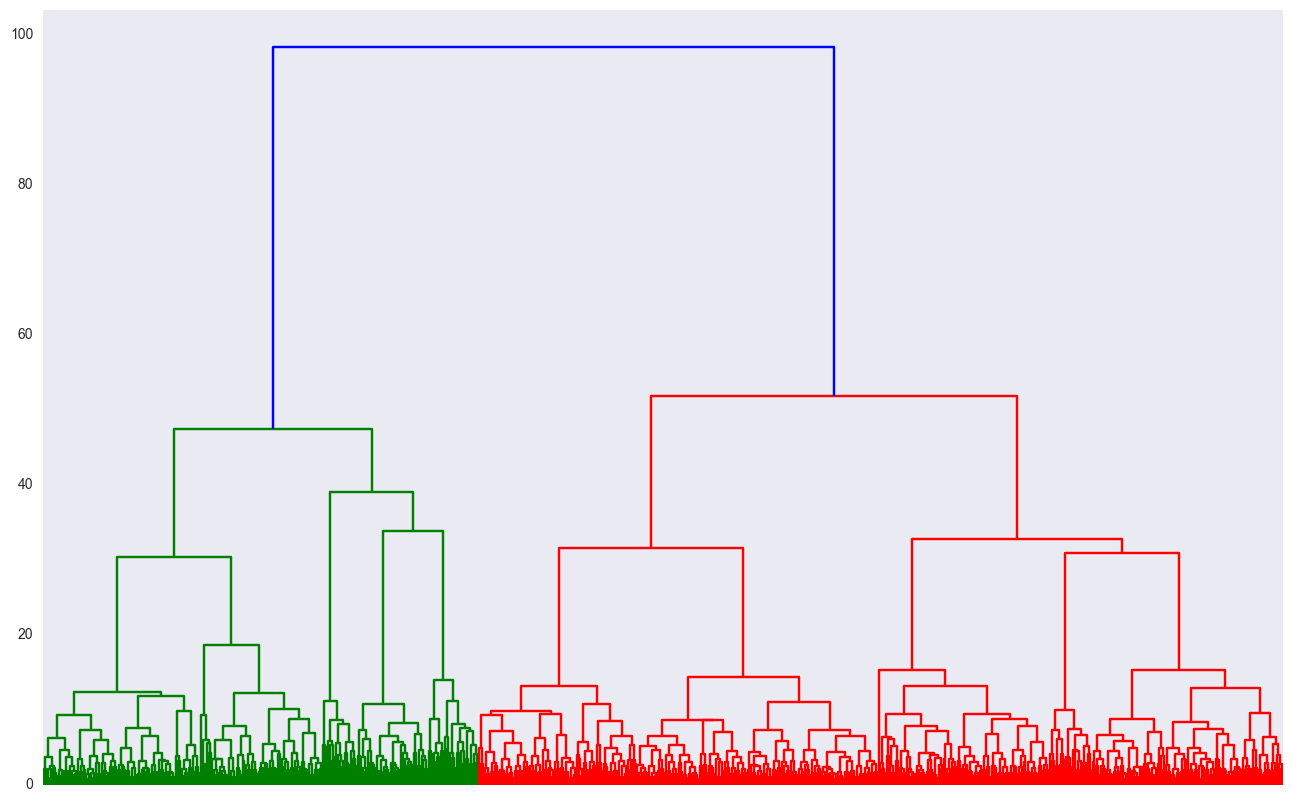

In [84]:
fig, ax = plt.subplots(figsize=(16,10))
dn = hierarchy.dendrogram(Z)
plt.xticks([])